# Lab 3

## 1. Obtain the dataset

The dataset (https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats, with Open Data license) contains images of dogs and cats, divided into training (1000 dogs, 1000 cats), validation (500 dogs, 500 cats), and test sets (1000 dogs, 1000 cats). Each image has a resolution of 180×180.

In [65]:
import pathlib

from keras.src.utils import image_dataset_from_directory

dataset_dir = pathlib.Path("./data/kaggle_dogs_vs_cats_small")

# load the dataset
train_dataset = image_dataset_from_directory(
    dataset_dir / "train",
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=True
)

validation_dataset = image_dataset_from_directory(
    dataset_dir / "validation",
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

test_dataset = image_dataset_from_directory(
    dataset_dir / "test",
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## 2. EDA

### 2.1 Class distribution

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class_names = train_dataset.class_names


# Calculate the class distribution for each subset
def get_class_counts(dataset):
  counts = {}
  for _, labels in dataset:
    unique, counts_unique = np.unique(labels, return_counts=True)
    for u, c in zip(unique, counts_unique):
      class_name = class_names[int(u)]
      counts[class_name] = counts.get(class_name, 0) + c
  return counts


train_counts = get_class_counts(train_dataset)
validation_counts = get_class_counts(validation_dataset)
test_counts = get_class_counts(test_dataset)

counts_df = pd.DataFrame({
  'Train': train_counts,
  'Validation': validation_counts,
  'Test': test_counts
}, index=class_names)

print("Class distribution for each subset:")
counts_df

Class distribution for each subset:


,Train,Validation,Test
cat,1000,500,1000
dog,1000,500,1000


<Figure size 600x600 with 0 Axes>

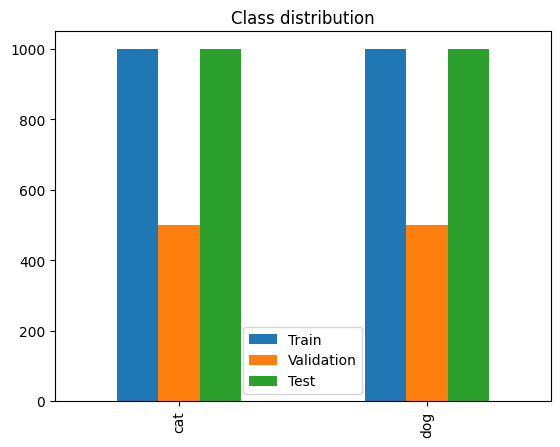

In [67]:
# Plot the class distribution
plt.figure(figsize=(6, 6))
counts_df.plot(kind='bar')
plt.title('Class distribution')
plt.show()

### 2.2 Display sample images

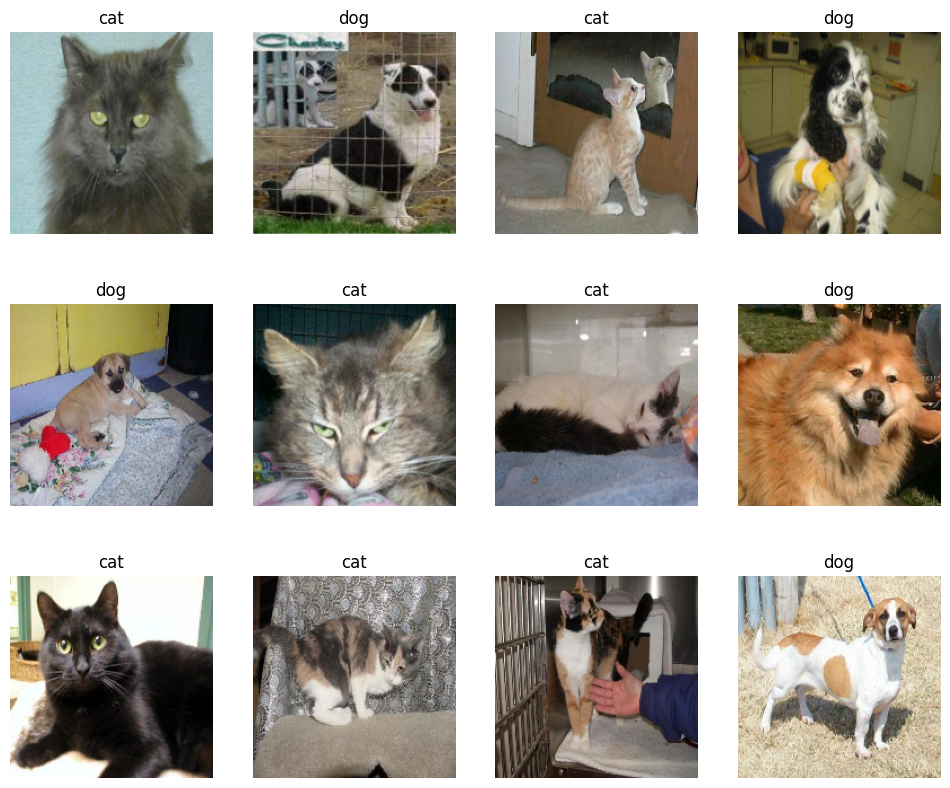

In [68]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
for images, labels in train_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

### 2.3 Image size and color channels

In [69]:
# Get the first image from the training dataset
for images, labels in train_dataset.take(1):
  print(f"Image size: {images.shape[1:3]}")
  print(f"Image color channels: {images.shape[3]}")
  break

Image size: (180, 180)
Image color channels: 3


### 2.4 Data augmentation

2024-11-25 18:51:42.764533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-11-25 18:51:42.825364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-11-25 18:51:42.879806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-11-25 18:51:42.932787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-11-25 18:51:42.988223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-11-25 18:51:43.055458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

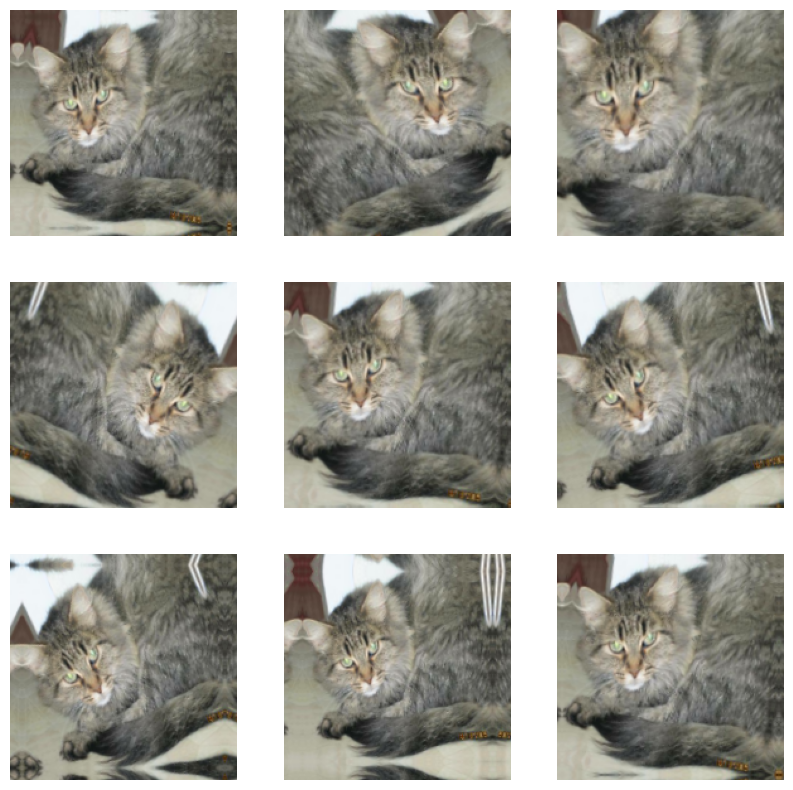

In [70]:
from keras import layers
import keras

# Data augmentation
data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2),
    ]
)

# Display augmented images
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## 3. Training vanilla CNN model

## 4. Fine-tuning VGG16 model

## 5. Evaluate the models

## 6. Conclusion